# Vyrovnání histogramu

### 0) Import knihoven

Nejprve je potřeba si naimportovat knihovny, které pro práci s obrázky budeme potřebovat.

In [1]:
import cv2 as cv # knihovna pro práci s obrázky
import numpy as np # obsahuje základní i pokročilé matematické funkce
from matplotlib import pyplot as plt # tato knihovna slouží ke kreslení grafů (a v našem případě i obrázků)
from matplotlib.colors import NoNorm # protože vykreslovací knihovna automaticky normalizuje histogram za nás, importujeme si i funkcni, která toto zakazuje

### 1) Definice funkcí

Funkce pro získání histogramu zadaného obrázku:

In [2]:
def get_hist(image):
    hist = np.zeros(256)    
    for i in range(len(image)):
            for j in range(len(image[0])):
                hist[int(image[i,j])] += 1
    return hist

Funkce pro vyrovnání histogramu obrázku. Vstup do funkce je obrázek, jehož histogram chceme vyrovnat, a histogram tohoto obrázku.

In [3]:
def eq_hist(hist, image):    
    # zjištění nejnižšího a nejvyššího jasu v obrázku
    i=0
    while(hist[i]==0):
        i+=1
    j=255
    while(hist[j]==0):
        j-=1
    # vyrovnání jasu
    for k in range(len(image)):
            for l in range(len(image[0])):
                image[k,l] = (image[k,l]-i)*(255.0/(j-i))                
    return image

### 2) Tělo programu

Tady pomocí výše definovaných funkcí vyrovnáme histogram obrázku.
#### 2.1) Načtení obrázku a spočítání histogramu
Nejprve si načteme obrázek ze souboru pomocí funkce 'imread' z knihovny 'cv2'.

In [4]:
img_uneq = cv.imread("uneq.jpg", 0)

Nyní můžeme spočítat histogram tohoto obrázku pomocí námi vytvořené funkce:

In [5]:
hist_uneq = get_hist(img_uneq)

#### 2.2) Vyrovnání histogramu
Nyní můžeme histogram vyrovnat pomocí námi vytvořené funkce:

In [6]:
img_eq = eq_hist(hist_uneq,img_uneq.copy())

A pro ověření spočítat histogram vyrovnaného obrázku:

In [7]:
hist_eq = get_hist(img_eq)

#### 2.3) Vykreslení obrázků

Nejprve vykreslíme oba histogramy:

[]

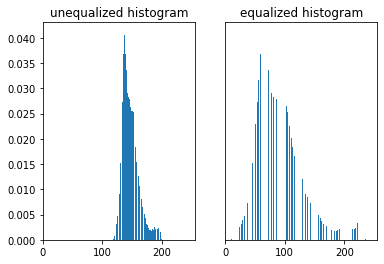

In [8]:
hfig, haxs = plt.subplots(ncols=2) # vytvoříme si dva grafy vedle sebe

# nejdříve zakreslíme původní histogram
haxs[0].set_title('unequalized histogram') # popisek grafu
haxs[0].bar([i for i in range(len(hist_uneq))],hist_uneq/float(sum(hist_uneq))) #vykreslíme normalizovaný histogram
haxs[0].set_xlim(0,256) # chceme u obou stejný rozsah na x-ové ose

# pak zakreslíme vyrovnaný histogram
haxs[1].set_title('equalized histogram') # popisek grafu
haxs[1].bar([i for i in range(len(hist_eq))],hist_eq/float(sum(hist_eq))) #vykreslíme normalizovaný histogram
haxs[1].set_xlim(0,256) # chceme u obou stejný rozsah na x-ové ose
haxs[1].set_yticks([]) # popisky y-ové osy stačí jen úplně vlevo

Nyní můžeme stejným způsobem vykreslit oba obrázky:

[]

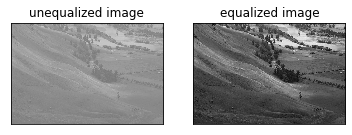

In [9]:
ifig, iaxs = plt.subplots(ncols=2)

# nejdříve zakreslíme původní obrázek
iaxs[0].set_title('unequalized image')
# imshow() standardne histogram narovnava, takze se to tu musi vypnout pomocí  'NoNorm()' :-)
iaxs[0].imshow(img_uneq,cmap='gray',norm=NoNorm())
iaxs[0].set_xticks([]) # vykreslujeme obrázek, popisky os nepotřebujeme
iaxs[0].set_yticks([]) # vykreslujeme obrázek, popisky os nepotřebujeme

# pak zakreslíme vyrovnaný obrázek
iaxs[1].set_title('equalized image')
# tady teoreticky ne, ale budeme konzistentni ;-)
iaxs[1].imshow(img_eq,cmap='gray',norm=NoNorm())
iaxs[1].set_xticks([]) # vykreslujeme obrázek, popisky os nepotřebujeme
iaxs[1].set_yticks([]) # vykreslujeme obrázek, popisky os nepotřebujeme